In [1]:
import os
import re
import cv2

In [22]:
lst_0 = sorted(os.listdir("C:\\Users\\ADMIN\\OneDrive\\Desktop\\helmet\\train\\1"), key=lambda x: int(re.search(r'\d+', x).group()))

lst_1 = sorted(os.listdir("C:\\Users\\ADMIN\\OneDrive\\Desktop\\helmet\\train\\0"), key=lambda x: int(re.search(r'\d+', x).group()))

In [26]:
lst_img_0 = []

common_size = (240, 240)  # Set the desired width and height

for path in lst_0:
    img_path = os.path.join("C:\\Users\\ADMIN\\OneDrive\\Desktop\\helmet\\train\\0", path)
    img = cv2.imread(img_path)
    if(img is None):
        continue
    resized_img = cv2.resize(img, common_size)
    normalized_img = resized_img / 255.0
    lst_img_0.append(normalized_img)

In [27]:
lst_img_1 = []

common_size = (240, 240)  # Set the desired width and height

for path in lst_1:
    img_path = os.path.join("C:\\Users\\ADMIN\\OneDrive\\Desktop\\helmet\\train\\1", path)
    img = cv2.imread(img_path)
    if(img is None):
        continue
    resized_img = cv2.resize(img, common_size)
    normalized_img = resized_img / 255.0
    lst_img_1.append(normalized_img)

In [32]:
import numpy as np

label_0 = np.zeros(len(lst_img_0)).tolist()
label_1 = np.ones(len(lst_img_1)).tolist()

In [33]:
lst_img = lst_img_0 + lst_img_1
label = label_0 + label_1

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6856\3910827270.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(label, shade=True)


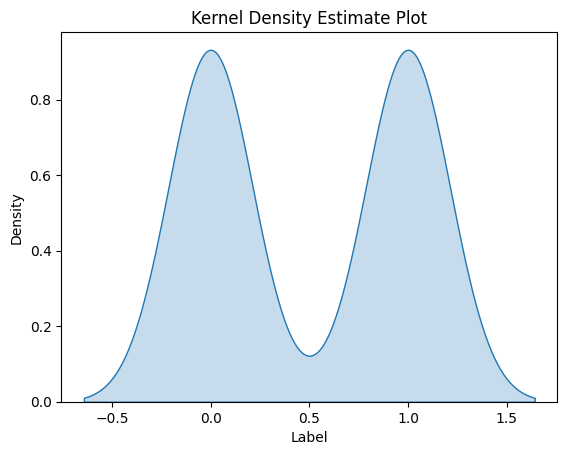

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `label` is your data
# label = ...

# Create the KDE plot
sns.kdeplot(label, shade=True)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot')

# Show the plot
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(lst_img, label, test_size=0.3, random_state=42)

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [9]:
def create_model(input_shape):
    model = Sequential([
        Conv2D(3, (3, 3), input_shape=input_shape, activation="relu"),
        MaxPooling2D((2, 2)),
        # Dropout(0.1),
        Conv2D(3, (3, 3), activation="relu"),
        # MaxPooling2D((2, 2)),
        # Dropout(0.1),
        Flatten(),
        # Dense(256, activation="relu"),
        # Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(1, activation="sigmoid")
    ])
    
    return model

In [10]:
input_shape = (240, 240, 3) # Thay đổi kích thước ảnh tùy thuộc vào dữ liệu của bạn
model = create_model(input_shape)

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
lst_img_array = np.array(X_train)

# Convert the list of labels to a NumPy array
label_array = np.array(y_train)

# Ensure label data is in the correct shape (matching the number of samples)
label_array = label_array.reshape((-1, 1))

# Assuming 'lst_img_array' is a list of images and 'label_array' is a list of corresponding labels (0 or 1)
model.fit(lst_img_array, label_array, epochs=9, batch_size=12)

Epoch 1/9
5/5 [==============================] - 1s 72ms/step - loss: 1.6286 - accuracy: 0.4630
Epoch 2/9
5/5 [==============================] - 0s 71ms/step - loss: 0.4432 - accuracy: 0.8519
Epoch 3/9
5/5 [==============================] - 0s 71ms/step - loss: 0.3405 - accuracy: 0.8889
Epoch 4/9
5/5 [==============================] - 0s 76ms/step - loss: 0.2074 - accuracy: 0.9630
Epoch 5/9
5/5 [==============================] - 0s 71ms/step - loss: 0.1427 - accuracy: 0.9630
Epoch 6/9
5/5 [==============================] - 0s 71ms/step - loss: 0.1001 - accuracy: 0.9630
Epoch 7/9
5/5 [==============================] - 0s 70ms/step - loss: 0.0682 - accuracy: 0.9815
Epoch 8/9
5/5 [==============================] - 0s 77ms/step - loss: 0.0418 - accuracy: 1.0000
Epoch 9/9
5/5 [==============================] - 0s 73ms/step - loss: 0.0224 - accuracy: 1.0000


In [12]:
model.save("weight/classify.h5")

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

y_pred = model.predict(np.array(X_test))


1/1 [==============================] - 0s 132ms/step


In [14]:
y_acc = []

for y in y_pred:
    if y[0] > 0.7:
        y_acc.append(1)
    else:
        y_acc.append(0)

Accuracy: 0.54


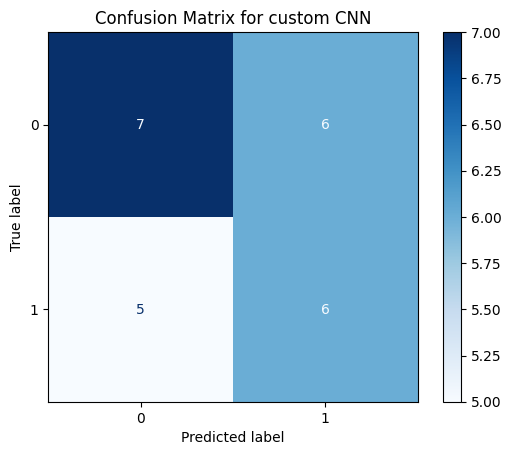

In [16]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_acc)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_acc)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for custom CNN')
plt.show()

In [ ]:
# one_lst = []
# zero_lst = []
# files = []

In [ ]:
# lst_path = sorted(os.listdir(folder_path), key=lambda x: int(re.search(r'\d+', x).group()))

# for path in lst_path:
#     img_process_path = os.path.join(folder_path, path)
#     img = cv2.imread(img_process_path)
#     img = cv2.resize(img, (240, 240))
#     img = img / 255.0
#     img = np.expand_dims(img, axis=0)
#     img = np.array(img)

#     result = model.predict(img)
    
#     print(result[0][0])

#     if result[0][0] >= 0.5:
#         one_lst.append(1)
#         # print("Length ones " + str(len(one_lst)))
#     else:
#         zero_lst.append(0)
#         files.append(path)
#         # print("Length zeros " + str(len(zero_lst)))

In [ ]:
# len(os.listdir("output_images"))

# SVM

In [24]:
lst_img_SVM = []

for img in lst_img:
    lst_img_SVM.append(img.flatten())

Accuracy: 0.54


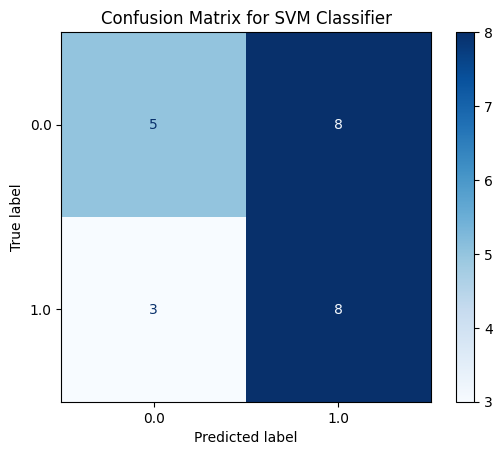

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lst_img_SVM, label, test_size=0.3, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear',C=3, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


# Logistic Regression

Accuracy: 0.50


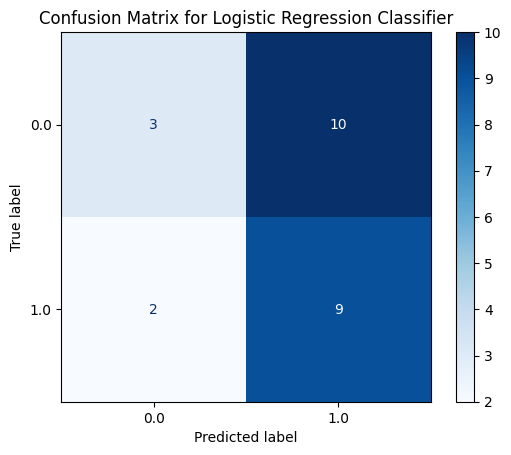

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lst_img_SVM, label, test_size=0.3, random_state=42)

# Create a Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=10000)

# Train the Logistic Regression classifier
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()


# SVM with HOG

In [12]:
from skimage.feature import hog
from skimage import color, exposure
import matplotlib.pyplot as plt

def extract_hog_features(image, visualize=False):
    """
    Extract HOG features from an image.

    Parameters:
    - image: ndarray
        Input image (grayscale or RGB).
    - visualize: bool
        If True, return the HOG image for visualization.

    Returns:
    - features: ndarray
        HOG feature vector.
    - hog_image: ndarray (optional)
        HOG image for visualization if visualize is True.
    """
    # Convert the image to grayscale if it is an RGB image
    if len(image.shape) == 3:
        image = color.rgb2gray(image)
    
    # Extract HOG features
    if visualize:
        features, hog_image = hog(image,
                                  orientations=9,
                                  pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2),
                                  block_norm='L2-Hys',
                                  visualize=visualize,
                                  transform_sqrt=True)
        return features, hog_image
    else:
        features = hog(image,
                       orientations=9,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys',
                       visualize=visualize,
                       transform_sqrt=True)
        return features

In [18]:
lst_img_SVM = []

for img in lst_img:
    img = img/255.0
    lst_img_SVM.append(extract_hog_features(image=img))

# SVM + HOG

Accuracy: 0.75


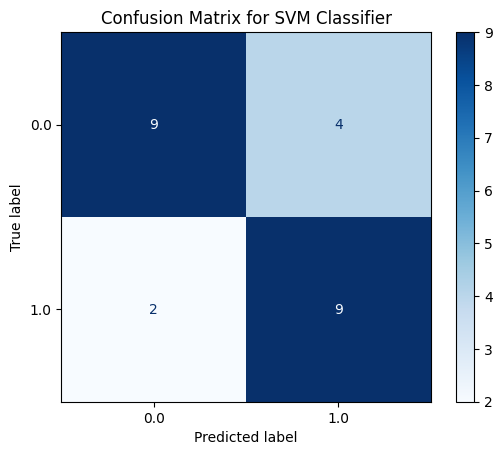

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lst_img_SVM, label, test_size=0.3, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear',C=3, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


In [21]:
import joblib

# Assuming `svm_classifier` is your trained model
joblib.dump(svm_classifier, 'weight/svm_classifier.pkl')


['weight/svm_classifier.pkl']

In [33]:
# Load the model
svm_classifier_loaded = joblib.load('weight/svm_classifier.pkl')


In [34]:
svm_classifier_loaded.predict(np.array(lst_img_SVM[0]).reshape(1, -1))[0]

1.0

# LOGISTIC REGRESSION + HOG

Accuracy: 0.71


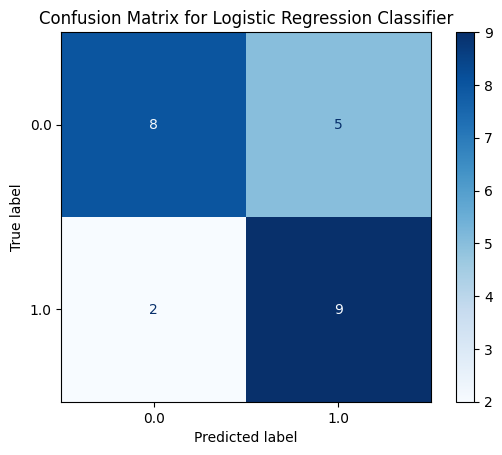

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(lst_img_SVM, label, test_size=0.3, random_state=42)

# Create a Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=10000)

# Train the Logistic Regression classifier
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()
